# Topic= House prices-Advanced Regression 
# Taks :implement a linear regression model to predict the prices of houses based on their square footage and the number of bedrooms and bathrooms.

# EDA=Exploratory Data analysis

In [ ]:
#TO perform Exploratory data analysis(EDA) on a housing dataset,you can examine various 
#distributions,correlations,and outliners.

#GrLivArea: Above-ground living area (in square feet).
#BedroomAbvGr: Number of bedrooms above ground.
#FullBath and HalfBath: Number of bathrooms (full and half).
#SalePrice: Target variable, representing the house price.

In [1]:
pwd()

'C:\\Users\\user'

# Step 1: import Libraries

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [5]:
pwd()

'C:\\Users\\user'

In [6]:
data=pd.read_csv("house-prices-csv.csv")
data        # update with your file path 

,ID,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [7]:
data.head()

,ID,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
data.tail()

,ID,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


# Step 2 : check missing values

In [15]:
print("Missing Values:")
print(data.isnull().sum().sort_values(ascending=False).head(10)) # show top 10 colums with missing valuse

Missing Values:
PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
MasVnrType      872
FireplaceQu     690
LotFrontage     259
GarageYrBlt      81
GarageCond       81
GarageType       81
dtype: int64


# Step 3:Desriptive statistics 

In [18]:
print("\nDescriptive statistics:")
print (data.describe())


Descriptive statistics:
                ID   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   18

# step 4: Data Visualization 

# Histplot:Distributin of house prices

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


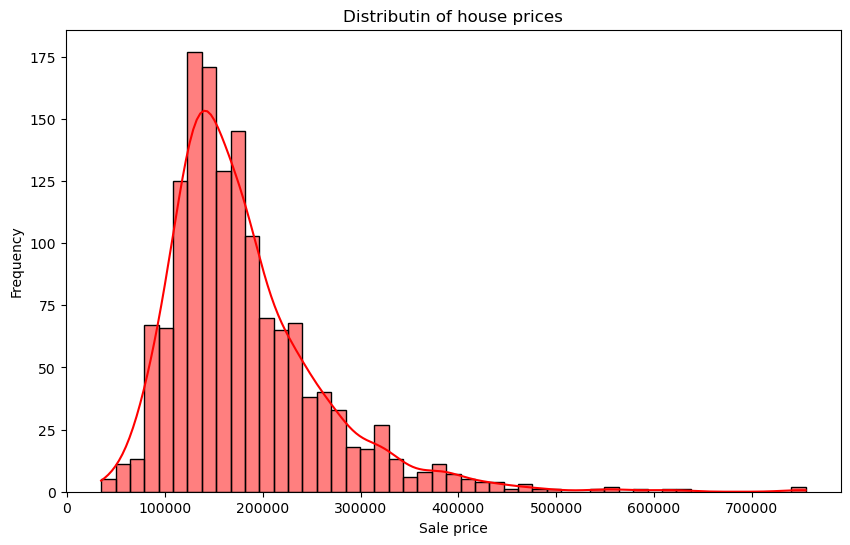

In [9]:
# Distribution of traget variable (saleprice)
plt.figure(figsize=(10,6))
sns.histplot(data["SalePrice"],kde=True,color="red")
plt.title("Distributin of house prices")
plt.xlabel("Sale price")
plt.ylabel("Frequency")
plt.show()

# Scatter Plot: Square Footage vs. Price 

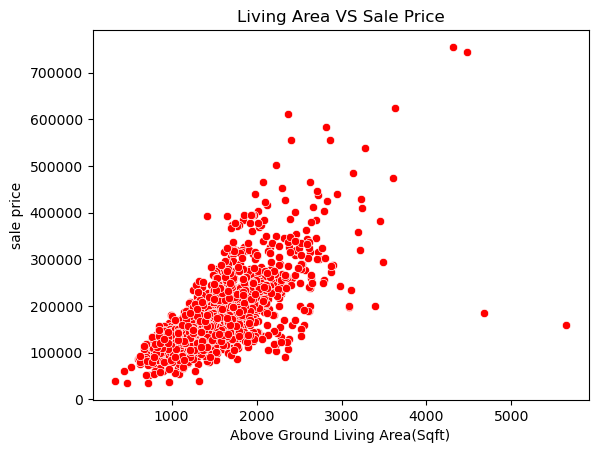

In [10]:
# Scatter plot for grliarea vs saleprce
sns.scatterplot(x=data["GrLivArea"],y=data["SalePrice"],color="red")
plt.title("Living Area VS Sale Price")
plt.xlabel("Above Ground Living Area(Sqft)")
plt.ylabel ("sale price")
plt.show()


# Heatmap: Correlation Matrix 

In [11]:
# Calculate the correlation matrix
correlation = data[['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath', 'SalePrice']].corr()

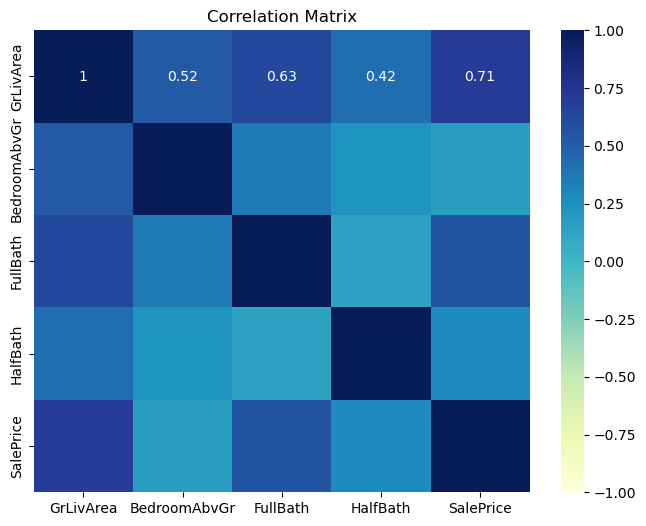

In [12]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap="YlGnBu", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

# Barplot :Average House Price by Number of Bedrooms 

C:\Users\user\AppData\Local\Temp\ipykernel_7688\2081289935.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data, x='BedroomAbvGr', y='SalePrice', estimator='mean',ci=None)


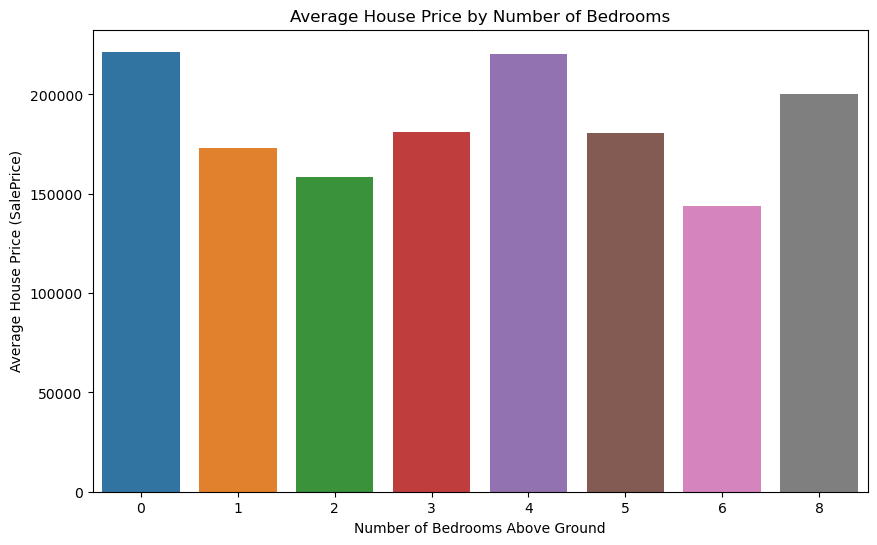

In [13]:
plt.figure(figsize=(10, 6))
sns.barplot(data, x='BedroomAbvGr', y='SalePrice', estimator='mean',ci=None)
plt.title("Average House Price by Number of Bedrooms")
plt.xlabel("Number of Bedrooms Above Ground")
plt.ylabel("Average House Price (SalePrice)")
plt.show()

# 4. Pair Plot 

In [25]:
# Pair plot of the selected features
sns.pairplot(data[['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath', 'SalePrice',]],color)
plt.show()

TypeError: pairplot() got an unexpected keyword argument 'color'

# Step 5: Select Features and Target 

In [ ]:
#Here, we're using GrLivArea, BedroomAbvGr, and FullBath as features to predict SalePrice

In [18]:
X = data[['GrLivArea', 'BedroomAbvGr', 'FullBath']]
y = data['SalePrice']

# Step 6: Split Data

In [19]:
# Step 4: Split Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Step7: Train the Model

In [20]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Step 8: Make Predictions 

In [21]:
y_pred = model.predict(X_test)

# Step 9 :Evaluate Model Performancems

In [22]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 3396389340.8588724
R-squared (R²): 0.5081866303840367
